#1. Проведите первичный анализ данных

In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/data/howpop_train.csv')
df.head()

Mounted at /content/drive


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

##Есть пропуски в столбцах author, flow, votes_plus, votes_minus
* author и flow заменим на 'unknown'
* votes_plus и votes_minus заменим на медиану

In [3]:
df['author'] = df['author'].fillna('unknown')
df['flow'] = df['flow'].fillna('unknown')
df['votes_plus'] = df['votes_plus'].fillna(df['votes_plus'].median())
df['votes_minus'] = df['votes_minus'].fillna(df['votes_minus'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            134137 non-null  object 
 5   flow              134137 non-null  object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        134137 non-null  float64
 13  votes_minus       134137 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Text(0.5, 1.0, 'Гистограмма votes_minus')

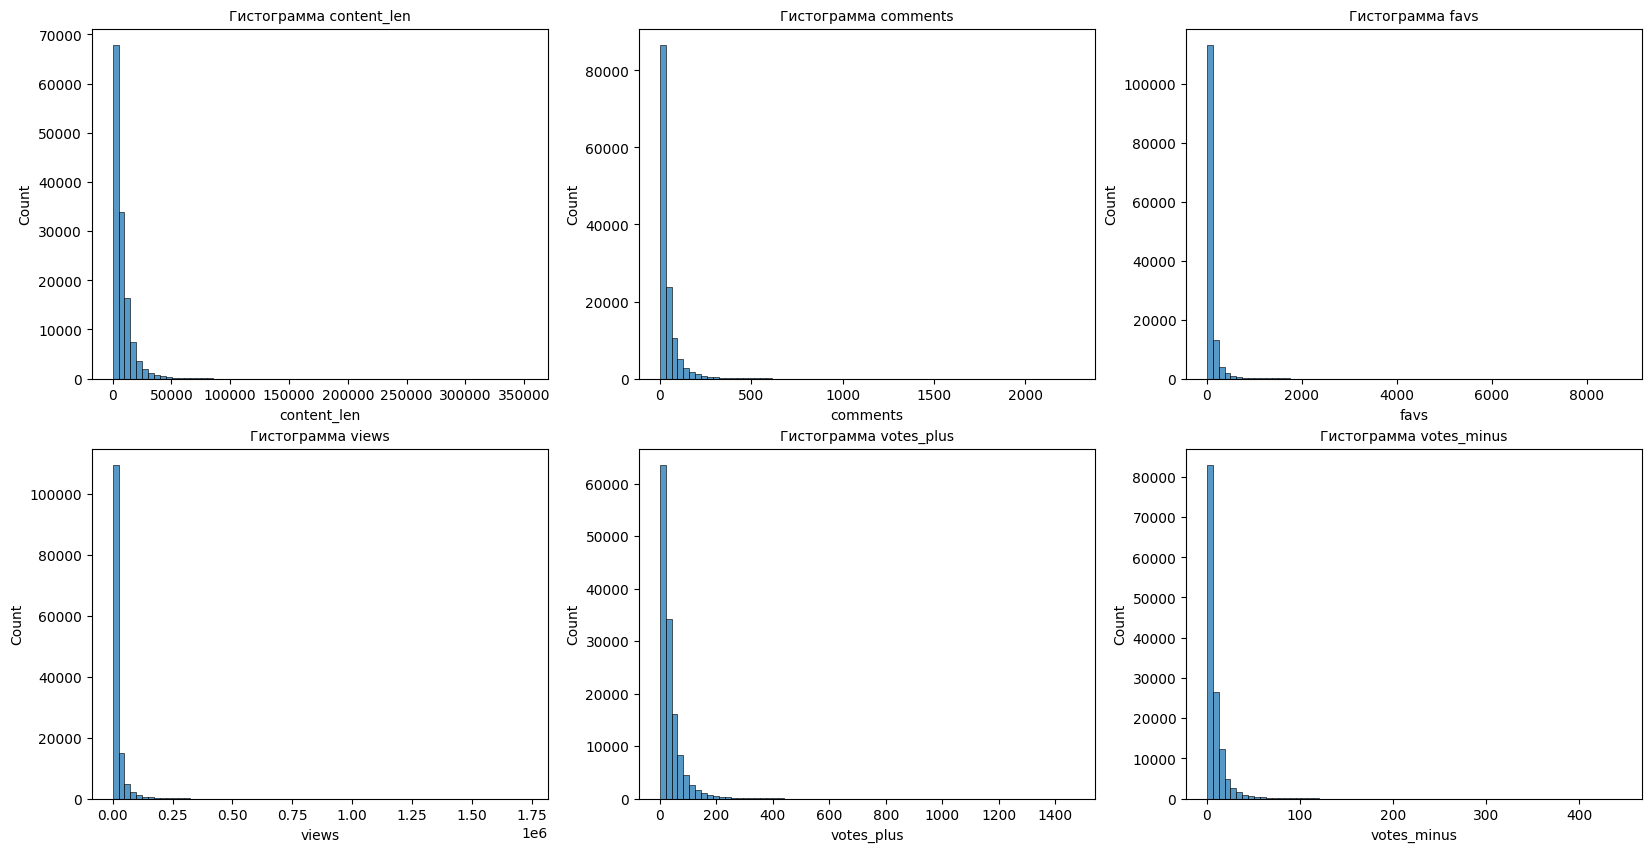

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.histplot(
    data=df,
    x='content_len',
    bins=70,
    ax=axes[0][0]
);
axes[0][0].set_title('Гистограмма content_len', fontsize=10)

sns.histplot(
    data=df,
    x='comments',
    bins=70,
    ax=axes[0][1]
)
axes[0][1].set_title('Гистограмма comments', fontsize=10)

sns.histplot(
    data=df,
    x='favs',
    bins=70,
    ax=axes[0][2]
);
axes[0][2].set_title('Гистограмма favs', fontsize=10)

sns.histplot(
    data=df,
    x='views',
    bins=70,
    ax=axes[1][0]
);
axes[1][0].set_title('Гистограмма views', fontsize=10)

sns.histplot(
    data=df,
    x='votes_plus',
    bins=70,
    ax=axes[1][1]
)
axes[1][1].set_title('Гистограмма votes_plus', fontsize=10)

sns.histplot(
    data=df,
    x='votes_minus',
    bins=70,
    ax=axes[1][2]
);
axes[1][2].set_title('Гистограмма votes_minus', fontsize=10)

##Попробуем найти выбросы в признаках 'content_len', 'comments', 'favs', 'views', 'votes_plus', 'votes_minus' с помощью метода Тьюки и логарифмированием

In [4]:
import numpy as np

def outliers_iqr(data, features, left=1.5, right=1.5, log_scale=False):
    outliers = pd.DataFrame(columns=df.columns)
    cleaned = pd.DataFrame(columns=df.columns)
    for feature in features:
      if log_scale == True:
        x = np.log(data[feature]+1)
      else:
        x = data[feature]
      quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
      iqr = quartile_3 - quartile_1
      lower_bound = quartile_1 - (iqr * left)
      upper_bound = quartile_3 + (iqr * right)
      outliers = pd.concat([data[(x < lower_bound) | (x > upper_bound)], outliers]).drop_duplicates().reset_index(drop=True)
      cleaned = pd.concat([data[(x >= lower_bound) & (x <= upper_bound)], cleaned]).drop_duplicates().reset_index(drop=True)
      return outliers, cleaned

outliers, cleaned = outliers_iqr(df, ['content_len', 'comments', 'favs', 'views', 'votes_plus', 'votes_minus'], left=3, right= 3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
# outliers.sort_values(by=['comments'], ascending=[False])

<ipython-input-4-7a4a4ca90587>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers = pd.concat([data[(x < lower_bound) | (x > upper_bound)], outliers]).drop_duplicates().reset_index(drop=True)
<ipython-input-4-7a4a4ca90587>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cleaned = pd.concat([data[(x >= lower_bound) & (x <= upper_bound)], cleaned]).drop_duplicates().reset_index(drop=True)


Число выбросов по методу Тьюки: 946
Результирующее число записей: 133191


Text(0.5, 1.0, 'Гистограмма votes_minus')

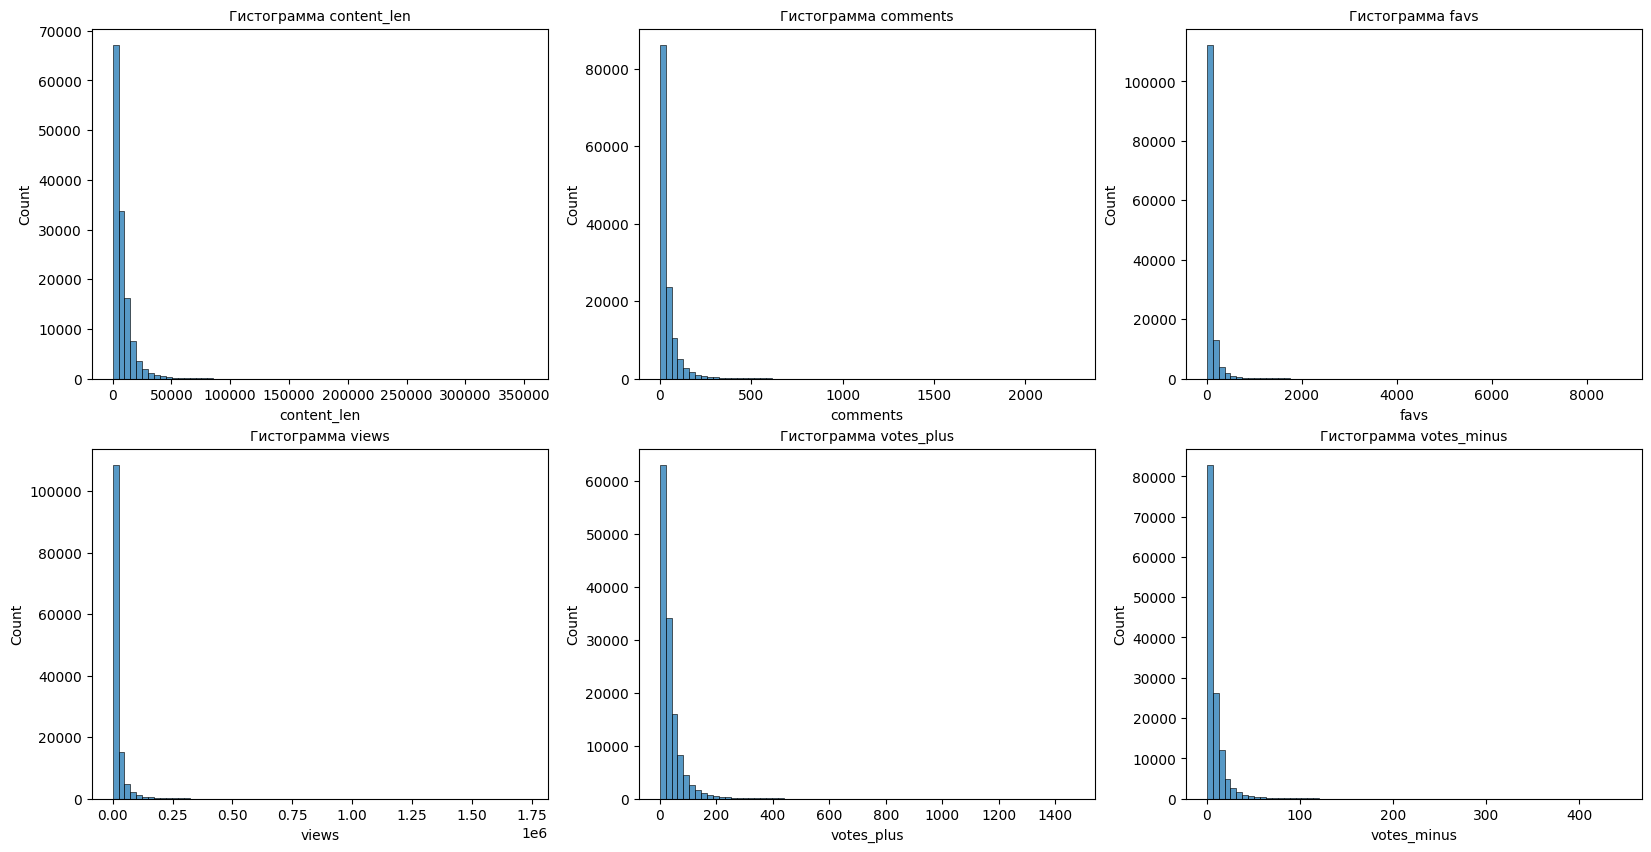

In [ ]:
cleaned = cleaned.astype(df.dtypes)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.histplot(
    data=cleaned,
    x='content_len',
    bins=70,
    ax=axes[0][0]
);
axes[0][0].set_title('Гистограмма content_len', fontsize=10)

sns.histplot(
    data=cleaned,
    x='comments',
    bins=70,
    ax=axes[0][1]
)
axes[0][1].set_title('Гистограмма comments', fontsize=10)

sns.histplot(
    data=cleaned,
    x='favs',
    bins=70,
    ax=axes[0][2]
);
axes[0][2].set_title('Гистограмма favs', fontsize=10)

sns.histplot(
    data=cleaned,
    x='views',
    bins=70,
    ax=axes[1][0]
);
axes[1][0].set_title('Гистограмма views', fontsize=10)

sns.histplot(
    data=cleaned,
    x='votes_plus',
    bins=70,
    ax=axes[1][1]
)
axes[1][1].set_title('Гистограмма votes_plus', fontsize=10)

sns.histplot(
    data=cleaned,
    x='votes_minus',
    bins=70,
    ax=axes[1][2]
);
axes[1][2].set_title('Гистограмма votes_minus', fontsize=10)

##Выбросы были найдены только в признаке content_len имеющих очень короткую длину

##Тепловая карта корреляции

<Axes: >

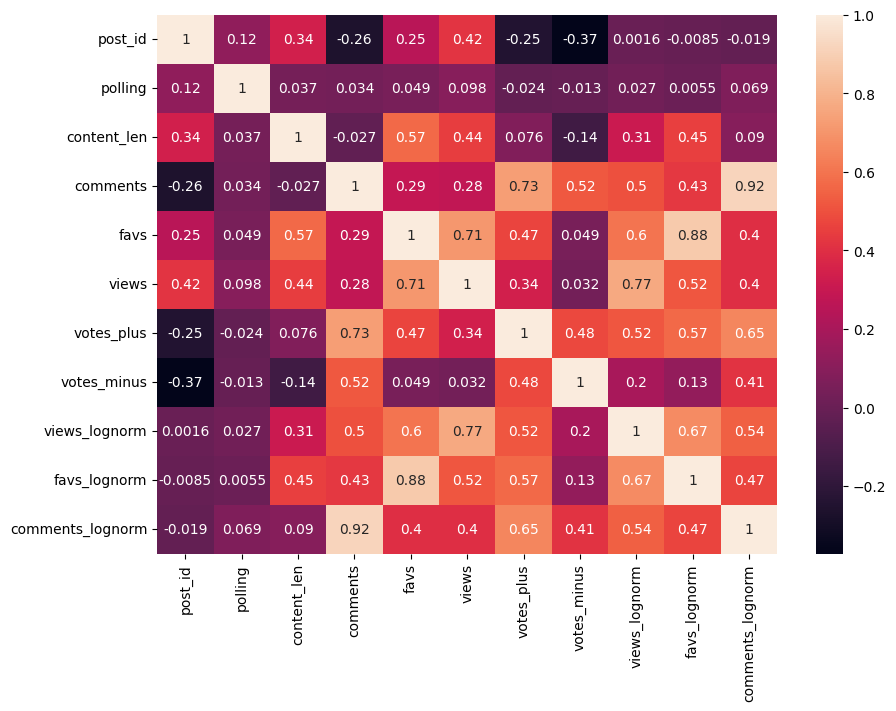

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10, 7))
sns.heatmap(cleaned.corr(numeric_only=True, method='spearman'), annot=True)

#2. Проверьте данные на нормальность(2-3 стобца)

In [ ]:
from scipy.stats import normaltest

print(f'p-value = {round(normaltest(cleaned["content_len"])[1], 5)}',
      f'p-value = {round(normaltest(cleaned["votes_plus"])[1], 5)}',
      f'p-value = {round(normaltest(cleaned["votes_minus"])[1], 5)}', sep='\n')


p-value = 0.0
p-value = 0.0
p-value = 0.0


## Признаки content_len, votes_plus, votes_minus не распределены нормально

#3. Выдвинете гипотезу, проверьте ее, не забывая объясняя свой выбор

## Первая гипотеза
* H0: корреляции нет между views и favs
* H1: корреляция есть между views и favs

In [ ]:
from scipy.stats import spearmanr

corr, p = spearmanr(cleaned['views'], cleaned['favs'])
if p > 0.05:
  print('Принимаеи H0 p-value > 0.05')
else:
  print(f'Принимаеи H1 p-value <= 0.05 {corr=}')

Принимаеи H1 p-value <= 0.05 corr=0.7085666299106054


## Вторая гипотеза
* H0: раcпределение votes_plus и votes_minus равны
* H1: раcпределение votes_plus и votes_minus не равны


In [5]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df['votes_plus'], df['votes_minus'], alternative='two-sided')
print(f'{p=}')
if p > 0.05:
  print('Принимаеи H0 p-value > 0.05')
else:
  print(f'Принимаеи H1 p-value <= 0.05')

p=0.0
Принимаеи H1 p-value <= 0.05
